In [8]:
# Instalar las librerías necesarias (en Colab)
!pip install trimesh vedo numpy matplotlib

Descargando modelo 3D desde GitHub...
Simplificando malla para mejor visualización...
Error al cargar el modelo: 'Trimesh' object has no attribute 'simplify_quadratic_decimation'
Creando modelo de respaldo (toro básico)...
Usando toro generado como respaldo


<Figure size 1200x1000 with 0 Axes>

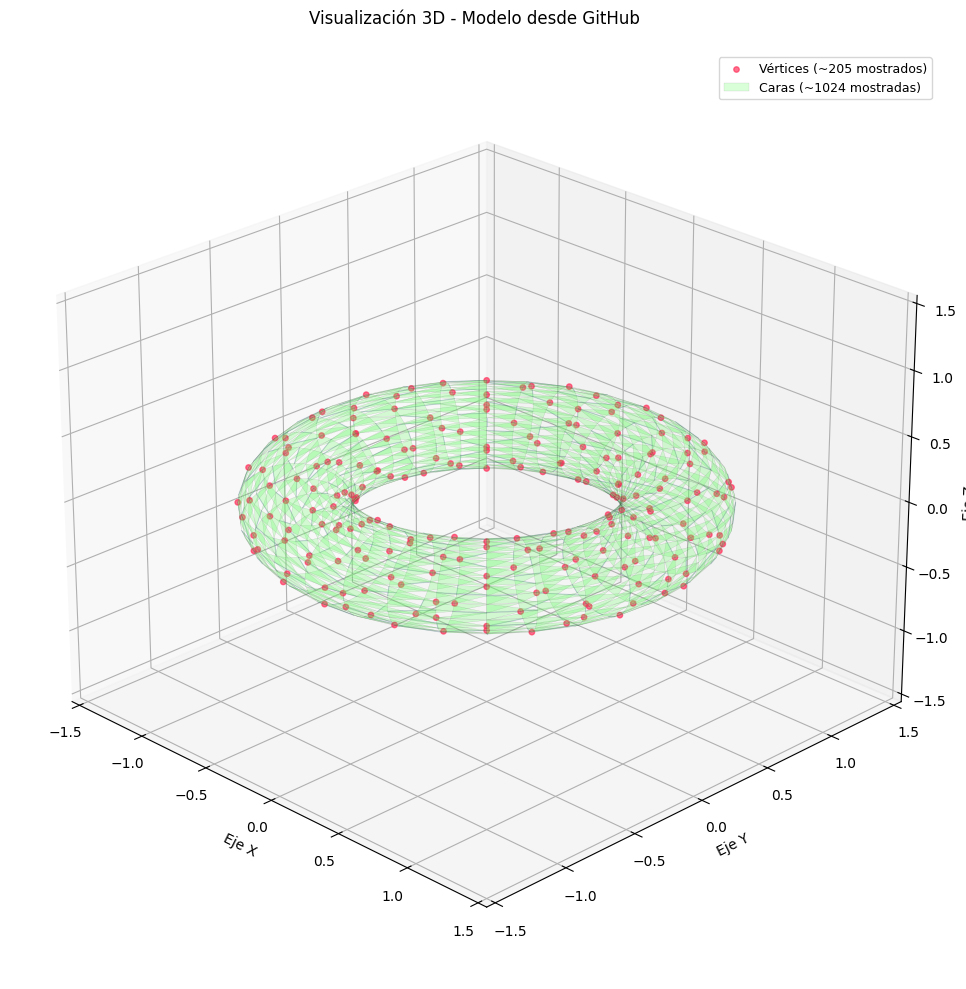

In [9]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import urllib.request
import io

# Configuración de la figura
plt.figure(figsize=(12, 10))

# URL alternativa de un modelo simple pero interesante (cabeza de conejo baja poliigonaje)
model_url = "https://raw.githubusercontent.com/alecjacobson/common-3d-test-models/master/data/stanford-bunny.obj"

try:
    # Descargar el modelo
    print("Descargando modelo 3D desde GitHub...")
    headers = {'User-Agent': 'Mozilla/5.0'}
    req = urllib.request.Request(model_url, headers=headers)
    response = urllib.request.urlopen(req)
    mesh_data = response.read()

    # Cargar el modelo OBJ
    mesh = trimesh.load(io.StringIO(mesh_data.decode('utf-8')), file_type='obj')

    # Simplificar la malla si es muy compleja (para visualización más rápida)
    if len(mesh.faces) > 2000:
        print("Simplificando malla para mejor visualización...")
        mesh = mesh.simplify_quadratic_decimation(2000)

    # Reparar la malla por si tiene problemas
    mesh.process()

    print(f"Modelo cargado correctamente: {len(mesh.vertices)} vértices, {len(mesh.faces)} caras")

except Exception as e:
    print(f"Error al cargar el modelo: {str(e)}")
    print("Creando modelo de respaldo (toro básico)...")
    # Versión corregida de creación del toro
    mesh = trimesh.creation.torus(major_radius=1.0, minor_radius=0.3)
    print("Usando toro generado como respaldo")

# Visualización mejorada
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Configuración de colores y estilos
vertex_color = '#FF355E'  # Rojo vibrante
edge_color = '#5D8AA8'    # Azul aeronáutico
face_color = '#66FF66'    # Verde brillante (con transparencia)

# Dibujar componentes (solo cada 5 vértices/aristas para mejor visualización)
ax.scatter(mesh.vertices[::5, 0], mesh.vertices[::5, 1], mesh.vertices[::5, 2],
           color=vertex_color, s=15, alpha=0.7, label=f'Vértices (~{len(mesh.vertices[::5])} mostrados)')

# Dibujar solo algunas aristas para mayor claridad
for edge in mesh.edges_unique[::10]:
    ax.plot(mesh.vertices[edge, 0], mesh.vertices[edge, 1], mesh.vertices[edge, 2],
            color=edge_color, linewidth=0.8, alpha=0.3)

ax.add_collection3d(Poly3DCollection([mesh.vertices[face] for face in mesh.faces[::2]],
                                   alpha=0.25, linewidths=0.2,
                                   facecolor=face_color, edgecolor='#333333',
                                   label=f'Caras (~{len(mesh.faces[::2])} mostradas)'))

# Configuración avanzada de la vista
ax.set_xlabel('Eje X', fontsize=10)
ax.set_ylabel('Eje Y', fontsize=10)
ax.set_zlabel('Eje Z', fontsize=10)
ax.set_title('Visualización 3D - Modelo desde GitHub', fontsize=12, pad=20)

# Ajustar la vista para mejor perspectiva
ax.view_init(elev=25, azim=-45)
ax.dist = 8  # Ajuste de distancia de la cámara

# Cuadrícula y leyenda
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend(loc='upper right', fontsize=9)

# Ajuste automático de los límites
center = mesh.centroid
max_dim = max(mesh.extents) * 1.2
ax.set_xlim([center[0]-max_dim/2, center[0]+max_dim/2])
ax.set_ylim([center[1]-max_dim/2, center[1]+max_dim/2])
ax.set_zlim([center[2]-max_dim/2, center[2]+max_dim/2])

plt.tight_layout()
plt.show()